<a href="https://colab.research.google.com/github/julianovale/PO240_Meta_heuristica/blob/main/PO240_Semana04_Tema4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Juliano Cesar Rodrigues Vale - RA: 265750
## Tema 4 - Ração Animal

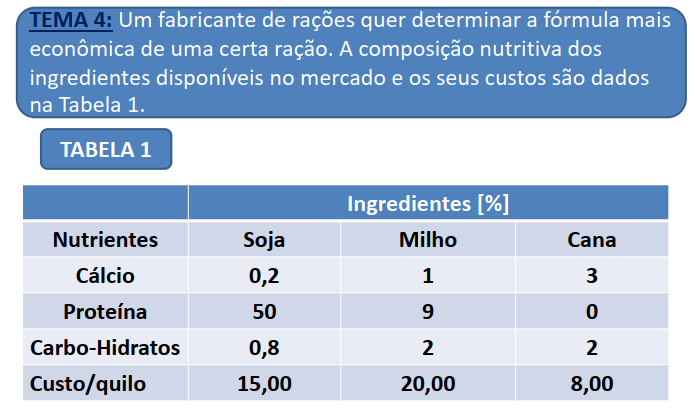

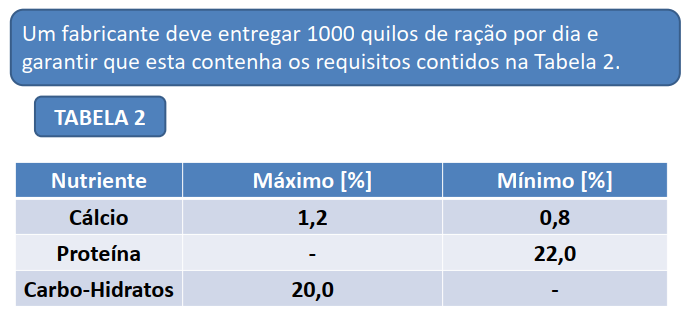

## Testei duas formulações "diferentes" com mesmo resultado.

# Problema:

## Variáveis de decisão:


$x_1$: Quilos de soja; 


$x_2$: Quilos de milho; 


$x_3$: Quilos de cana. 


## Restrições:

*s.t.:*

$x1 + x2 + x3 = 1000$ 


$0,002\frac{x1}{1000}+ 0,01\frac{x2}{1000}+ 0,03\frac{x3}{1000}\geq 0,008$ 


$0,002\frac{x1}{1000}+ 0,01\frac{x2}{1000}+ 0,03\frac{x3}{1000}\leq 0,012$ 


$0,5\frac{x1}{1000}+ 0,09\frac{x2}{1000} \geq 0,22$ 


$0,08\frac{x1}{1000}+ 0,2\frac{x2}{1000}+ 0,2\frac{x3}{1000} \leq 0,20$ 


$x_1, x_2, x_3 \geq 0$ 


## Função objetivo:

$Min\ Z = 15x_1 + 20x_2 + 8x_3$ 

In [1]:
! pip install ortools # rodar duas vezes

In [2]:
from ortools.linear_solver import pywraplp

In [3]:
# Inicializa o solver
pl = pywraplp.Solver('Problema da Ração Animal - Tema 4', pywraplp.Solver.GLOP_LINEAR_PROGRAMMING)

# Dados do Problema
N_VAR = 3
N_REST = 5

# Matriz A vezes o vetor x
# A*x <= b

A = [[-0.002/1000, -0.01/1000, -0.03/1000],
     [0.002/1000, 0.01/1000, 0.03/1000],
     [-0.50/1000, -0.09/1000, 0],
     [0.008/1000, 0.02/1000, 0.02/1000],
     [-1,-1,-1]] # Matriz de coeficientes
B = [-0.008, 0.012, -0.22, 0.20, -1000] # Vetor de resultados
C = [15.0, 20.0, 8.0] # Coeficientes da função objetivo

# alocação de memória das variáveis e restrições
x = []
for j in range(N_VAR):
  x.append(0)

rest = []
for i in range(N_REST):
  rest.append(0)
    
# VARIÁVEIS DE DECISÃO
for j in range(N_VAR):   
  x[j] = pl.NumVar(0, pl.infinity(), 'x'+str(j))  # min, max, nome

# RESTRIÇÕES
# define o lado direito das restrições <= 
for i in range(N_REST):  
  rest[i] = pl.Constraint(-pl.infinity(), B[i])  # min, max

# define o coeficiente das variáveis no lado esquerdo das restrições 
for i in range(N_REST):  # linhas
  for j in range(N_VAR): # colunas
    rest[i].SetCoefficient(x[j], A[i][j])

# função objetivo: Minimizar C1*x1 +...
obj = pl.Objective()
for j in range(N_VAR):
  obj.SetCoefficient(x[j], C[j])
obj.SetMinimization()

# Resolve
pl.Solve()

# Imprime o valor de cada variável na solução ótima e da função-objetivo
print("Função-objetivo = ", pl.Objective().Value())
for j in range(N_VAR):  # j = 0, 1
  print("Quilogramas de x%d" %(j+1),"=", x[j].solution_value())

Função-objetivo =  12500.0
Quilogramas de x1 = 642.8571428571428
Quilogramas de x2 = 0.0
Quilogramas de x3 = 357.1428571428572


# Problema:

## Variáveis de decisão:


$x_1$: Quilos de soja; 

$x_2$: Quilos de milho; 


$x_3$: Quilos de cana.


## Restrições:

*s.t.:*

$x1 + x2 + x3 = 1000$ 


$0,002 \cdot x1+ 0,01\cdot x2+ 0,03\cdot x3\geq 0,008 \cdot 1000$ 

$0,002 \cdot x1+ 0,01+ 0,01\cdot x2+ 0,03\cdot x3 \leq 0,012  \cdot 1000$ 


$0,5 \cdot x1+ 0,01+ 0,09\cdot x2\geq 0,22  \cdot 1000$ 

$0,08 \cdot x1+ 0,01+ 0,2\cdot x2+ 0,2\cdot x3 \leq 0,20 \cdot 1000$


$x_1, x_2, x_3 \geq 0$ 


## Função objetivo:

$Min\ Z = 15x_1 + 20x_2 + 8x_3$ 

In [4]:
# Inicializa o solver
pl = pywraplp.Solver('Problema da Ração Animal - Tema 4', pywraplp.Solver.GLOP_LINEAR_PROGRAMMING)

# Dados do Problema
N_VAR = 3
N_REST = 5

# Matriz A vezes o vetor x
# A*x <= b

A = [[-0.002, -0.01, -0.03],
     [0.002, 0.01, 0.03],
     [-0.50, -0.09, 0],
     [0.008, 0.02, 0.02],
     [-1,-1,-1]] # Matriz de coeficientes
B = [-0.008*1000, 0.012*1000, -0.22*1000, 0.20*1000, -1000] # Vetor de resultados
C = [15.0, 20.0, 8.0] # Coeficientes da função objetivo

# alocação de memória das variáveis e restrições
x = []
for j in range(N_VAR):
  x.append(0)

rest = []
for i in range(N_REST):
  rest.append(0)
    
# VARIÁVEIS DE DECISÃO
for j in range(N_VAR):   
  x[j] = pl.NumVar(0, pl.infinity(), 'x'+str(j))  # min, max, nome

# RESTRIÇÕES
# define o lado direito das restrições <= 
for i in range(N_REST):  
  rest[i] = pl.Constraint(-pl.infinity(), B[i])  # min, max

# define o coeficiente das variáveis no lado esquerdo das restrições 
for i in range(N_REST):  # linhas
  for j in range(N_VAR): # colunas
    rest[i].SetCoefficient(x[j], A[i][j])

# função objetivo: Minimizar C1*x1 +...
obj = pl.Objective()
for j in range(N_VAR):
  obj.SetCoefficient(x[j], C[j])
obj.SetMinimization()

# Resolve
pl.Solve()

# Imprime o valor de cada variável na solução ótima e da função-objetivo
print("Função-objetivo = ", pl.Objective().Value())
for j in range(N_VAR):  # j = 0, 1
  print("Quilogramas de x%d" %(j+1),"=", x[j].solution_value())

Função-objetivo =  12500.000000000004
Quilogramas de x1 = 642.8571428571431
Quilogramas de x2 = 0.0
Quilogramas de x3 = 357.1428571428571
